## Data Preprocessing

In [53]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Settings:
img_size = 64
bonus = False
grayscale_images = not bonus
n_channels = 1 if grayscale_images else 3
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, n_channels))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = np.array(X).astype('float32')
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


X, X_test, Y, Y_test = get_dataset()

# import os
# import numpy as np
# from os import listdir
# from matplotlib.pyplot import imread
# from skimage.transform import resize
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split


# # Settings:
# img_size = 64
# grayscale_images = True
# num_class = 10
# test_size = 0.2

# from PIL import Image
# def get_img(data_path):
#     # Getting image array from path:
#     # print("=====================================================")
#     # print(type(imread(data_path)))
#     img = Image.open(data_path)
#     # print(type(np.array(img).astype("float32")))
#     # img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
#     return img.convert("L")


# def get_dataset(dataset_path='Dataset'):
#     # Getting all data from data path:
#     try:
#         X = np.load('npy_dataset/X.npy')
#         Y = np.load('npy_dataset/Y.npy')
#     except:
#         labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
#         X = []
#         Y = []
#         for i, label in enumerate(labels):
#             datas_path = dataset_path + '/' + label
#             for data in listdir(datas_path):
#                 img = get_img(datas_path + '/' + data)
#                 X.append(np.array(img).astype("float32") / 255.0)
#                 Y.append(i)
#         # Create dateset:
#         X = np.array(X)
#         Y = np.array(Y).astype('float32')
#         Y = to_categorical(Y, num_class)
#         if not os.path.exists('npy_dataset/'):
#             os.makedirs('npy_dataset/')
#         np.save('npy_dataset/X.npy', X)
#         np.save('npy_dataset/Y.npy', Y)
#     X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
#     return X, X_test, Y, Y_test


# X, X_test, Y, Y_test = get_dataset()


## Imports

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(X.shape)
print(X[0].shape)
print(type(X))
print(type(X[0]))

(1649, 64, 64, 1)
(64, 64, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(type(X[0]))

<class 'numpy.ndarray'>


In [56]:
def visualize_image_gray(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap=plt.cm.binary)

In [57]:
def visualize_image_rgb(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

## Images Visualization

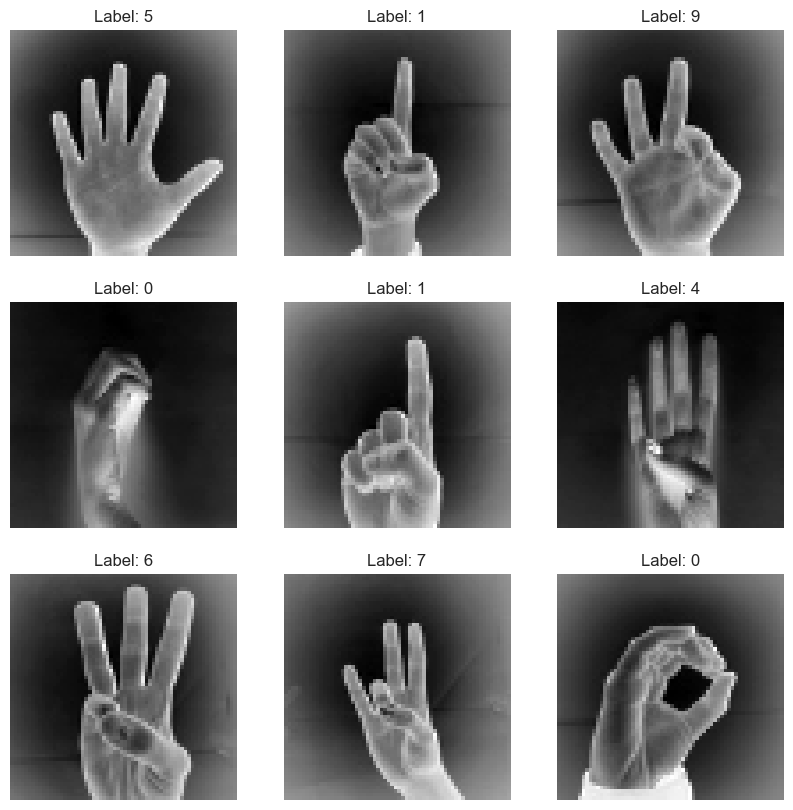

In [58]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_gray(X[i * 100], label="Label: " + str(y[i * 100]))

## Cross Validation function

In [59]:
def applyCrossValidation(model, X, Y, num_folds=5, num_epochs=10):
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(X, Y):
    model.fit(X[train], Y[train], batch_size=32, epochs=num_epochs, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=7,
            restore_best_weights=True
        )])
    scores = model.evaluate(X[test], Y[test], verbose=2)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1
    # acc_per_fold.append(scores[1] * 100)
    # loss_per_fold.append(scores[0])

## Preparing model

In [60]:
inputs = tf.keras.Input(shape=(img_size, img_size, n_channels))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Training

In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# history = model.fit(
#     X,
#     y,
#     validation_split=0.2,
#     batch_size=32,
#     epochs=100,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
# )
applyCrossValidation(model, X, y, 3)

Epoch 1/10
35/35 [==============================] - 1s 29ms/step - loss: 2.3055 - accuracy: 0.1065
Epoch 2/10
35/35 [==============================] - 1s 26ms/step - loss: 2.2500 - accuracy: 0.1829
Epoch 3/10
35/35 [==============================] - 1s 25ms/step - loss: 1.7711 - accuracy: 0.4386
Epoch 4/10
35/35 [==============================] - 1s 25ms/step - loss: 1.1542 - accuracy: 0.6224
Epoch 5/10
35/35 [==============================] - 1s 29ms/step - loss: 0.8854 - accuracy: 0.7152
Epoch 6/10
35/35 [==============================] - 1s 27ms/step - loss: 0.6601 - accuracy: 0.7871
Epoch 7/10
35/35 [==============================] - 1s 28ms/step - loss: 0.6139 - accuracy: 0.8126
Epoch 8/10
35/35 [==============================] - 1s 25ms/step - loss: 0.4658 - accuracy: 0.8562
Epoch 9/10
35/35 [==============================] - 1s 24ms/step - loss: 0.4047 - accuracy: 0.8781
Epoch 10/10
35/35 [==============================] - 1s 25ms/step - loss: 0.3287 - accuracy: 0.9026
18/18 - 0

## Evaluating

In [62]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Loss: 0.63499
Test Accuracy: 86.20%


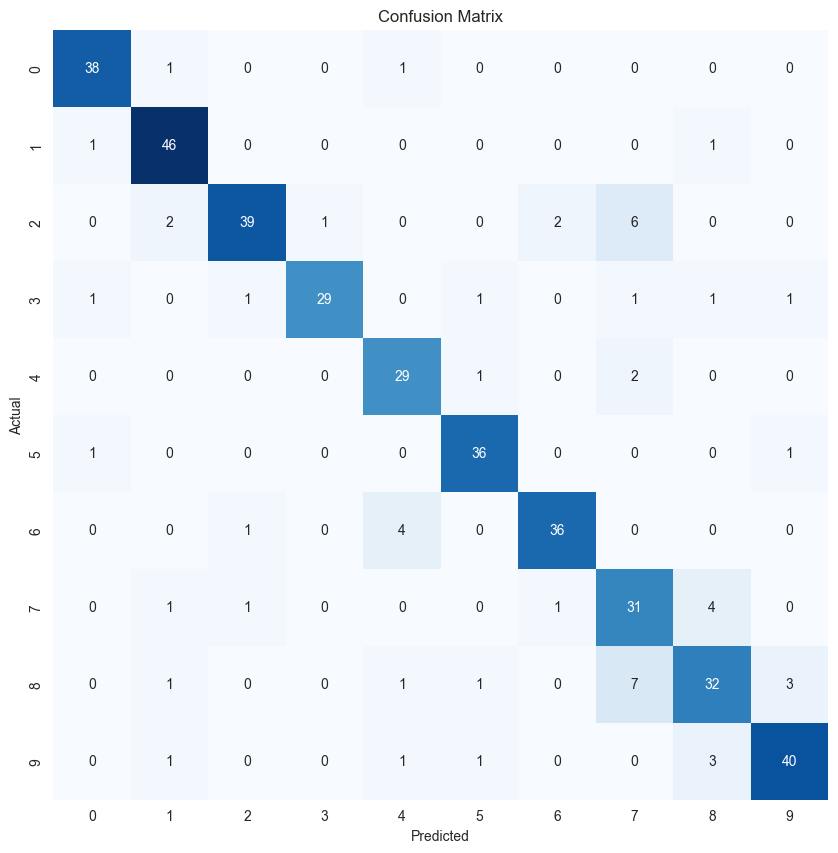

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.88      0.96      0.92        48
           2       0.93      0.78      0.85        50
           3       0.97      0.83      0.89        35
           4       0.81      0.91      0.85        32
           5       0.90      0.95      0.92        38
           6       0.92      0.88      0.90        41
           7       0.66      0.82      0.73        38
           8       0.78      0.71      0.74        45
           9       0.89      0.87      0.88        46

    accuracy                           0.86       413
   macro avg       0.87      0.86      0.86       413
weighted avg       0.87      0.86      0.86       413



In [63]:
evaluate_model(model, X_test, y_test)

In [64]:
y_pred = np.argmax(model.predict(X_test), axis=1)
pred = model.predict(X_test)

In [65]:
pred[0]

array([1.2370560e-06, 1.7135784e-10, 2.6985626e-07, 3.1944603e-06,
       6.4791679e-01, 1.6024476e-04, 3.1954205e-01, 1.5903229e-02,
       1.4025867e-02, 2.4470540e-03], dtype=float32)

# ANN

In [66]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2 , random_state = 42)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model1.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=7,
#             restore_best_weights=True
#         )
#     ])
applyCrossValidation(model1, X, Y, 3)

Epoch 1/10


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


35/35 [==============================] - 1s 12ms/step - loss: 3.0157 - accuracy: 0.0946
Epoch 2/10
35/35 [==============================] - 0s 11ms/step - loss: 2.3298 - accuracy: 0.1183
Epoch 3/10
35/35 [==============================] - 0s 12ms/step - loss: 2.3057 - accuracy: 0.1101
Epoch 4/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2883 - accuracy: 0.1137
Epoch 5/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2803 - accuracy: 0.1338
Epoch 6/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2770 - accuracy: 0.1328
Epoch 7/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2534 - accuracy: 0.1410
Epoch 8/10
35/35 [==============================] - 0s 14ms/step - loss: 2.2258 - accuracy: 0.1547
Epoch 9/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2103 - accuracy: 0.1574
Epoch 10/10
35/35 [==============================] - 0s 12ms/step - loss: 2.2070 - accuracy: 0.1656
18/18 - 0s - loss: 2

In [67]:
# score = model1.evaluate(X_test, Y_test)
# print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))
y_pred = np.argmax(model1.predict(X_test), axis=1)
clr = classification_report(np.argmax(Y_test, axis=1), y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        35
           4       0.08      1.00      0.14        32
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        46

    accuracy                           0.08       413
   macro avg       0.01      0.10      0.01       413
weighted avg       0.01      0.08      0.01       413



c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [68]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  # tf.keras.layers.Dense(128, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  # tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(16, activation=tf.nn.relu),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model2.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=100, callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=7,
#             restore_best_weights=True
#         )
#     ])
applyCrossValidation(model2, X, Y, 3, 15)

Epoch 1/15


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


35/35 [==============================] - 1s 10ms/step - loss: 2.5241 - accuracy: 0.1192
Epoch 2/15
35/35 [==============================] - 0s 11ms/step - loss: 2.3689 - accuracy: 0.1028
Epoch 3/15
35/35 [==============================] - 0s 12ms/step - loss: 2.2755 - accuracy: 0.1520
Epoch 4/15
35/35 [==============================] - 0s 13ms/step - loss: 2.2363 - accuracy: 0.1702
Epoch 5/15
35/35 [==============================] - 0s 12ms/step - loss: 2.1631 - accuracy: 0.2011
Epoch 6/15
35/35 [==============================] - 0s 14ms/step - loss: 2.1474 - accuracy: 0.2138
Epoch 7/15
35/35 [==============================] - 0s 12ms/step - loss: 2.1355 - accuracy: 0.2157
Epoch 8/15
35/35 [==============================] - 0s 12ms/step - loss: 2.0377 - accuracy: 0.2284
Epoch 9/15
35/35 [==============================] - 0s 13ms/step - loss: 1.9570 - accuracy: 0.2739
Epoch 10/15
35/35 [==============================] - 0s 11ms/step - loss: 1.8833 - accuracy: 0.3185
Epoch 11/15
35/35 [=

In [69]:
# score = model2.evaluate(X_test, Y_test)
# print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))
y_pred = np.argmax(model2.predict(X_test), axis=1)
clr = classification_report(np.argmax(Y_test, axis=1), y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.79      0.85      0.82        48
           2       0.76      0.62      0.68        50
           3       0.76      0.71      0.74        35
           4       0.46      0.66      0.54        32
           5       0.74      0.89      0.81        38
           6       0.62      0.73      0.67        41
           7       0.51      0.68      0.58        38
           8       0.70      0.42      0.53        45
           9       0.87      0.59      0.70        46

    accuracy                           0.69       413
   macro avg       0.70      0.70      0.69       413
weighted avg       0.71      0.69      0.69       413



## SVM

In [70]:
from sklearn.svm import SVC

X_d2 = []
X_test_d2 = []
for img in X:
	X_d2.append(img.flatten())
for img in X_test:
	X_test_d2.append(img.flatten())
X_d2 = np.array(X_d2)
X_test_d2 = np.array(X_test_d2)
model_linear = SVC(kernel='linear')
model_linear.fit(X_d2, y)

y_pred = model_linear.predict(X_test_d2)


Test Loss: 0.63499
Test Accuracy: 86.20%


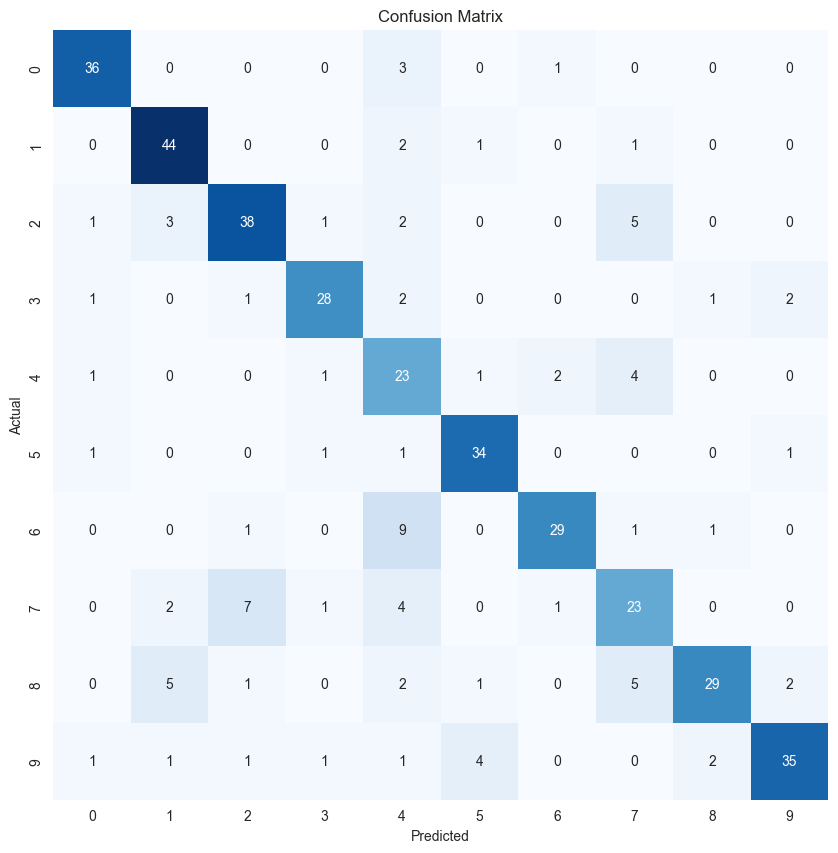

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.80      0.92      0.85        48
           2       0.78      0.76      0.77        50
           3       0.85      0.80      0.82        35
           4       0.47      0.72      0.57        32
           5       0.83      0.89      0.86        38
           6       0.88      0.71      0.78        41
           7       0.59      0.61      0.60        38
           8       0.88      0.64      0.74        45
           9       0.88      0.76      0.81        46

    accuracy                           0.77       413
   macro avg       0.78      0.77      0.77       413
weighted avg       0.79      0.77      0.78       413



In [71]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

results = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)